In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

from sklearn.linear_model import LassoCV, ElasticNetCV, LinearRegression

In [6]:
# read first 5 lines of the CSV file
radiomics_test = pd.read_csv('../../data/regression/img_test.csv', nrows=5)

print(radiomics_test.head())

print(len(radiomics_test["img"].iloc[0]))

       eid   age                                                img
0  1034715  51.5  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1  1035460  61.0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2  1038051  61.8  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3  1062412  66.1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4  1104759  52.9  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
302177


In [9]:
with open('../../data/raw/radiomics_healthy_wat.csv', 'r') as f:
    header = f.readline().strip().split(',')
    print(header)
    print(len(header))
    first_line = f.readline()
    sec_line = f.readline().strip().split(',')
    print(sec_line)
    print(len(sec_line))
    third_line = f.readline().strip().split(',')
    print(third_line)
    print(len(third_line))
    with open('outfile_test_radiomics.csv', 'w') as out_f:
        out_f.write(first_line + '\n')
        out_f.write(','.join(sec_line) + '\n')
        out_f.write(','.join(third_line) + '\n')


['spleen_shape_Elongation', 'spleen_shape_Flatness', 'spleen_shape_LeastAxisLength', 'spleen_shape_MajorAxisLength', 'spleen_shape_Maximum2DDiameterColumn', 'spleen_shape_Maximum2DDiameterRow', 'spleen_shape_Maximum2DDiameterSlice', 'spleen_shape_Maximum3DDiameter', 'spleen_shape_MeshVolume', 'spleen_shape_MinorAxisLength', 'spleen_shape_Sphericity', 'spleen_shape_SurfaceArea', 'spleen_shape_SurfaceVolumeRatio', 'spleen_shape_VoxelVolume', 'spleen_firstorder_10Percentile', 'spleen_firstorder_90Percentile', 'spleen_firstorder_Energy', 'spleen_firstorder_Entropy', 'spleen_firstorder_InterquartileRange', 'spleen_firstorder_Kurtosis', 'spleen_firstorder_Maximum', 'spleen_firstorder_MeanAbsoluteDeviation', 'spleen_firstorder_Mean', 'spleen_firstorder_Median', 'spleen_firstorder_Minimum', 'spleen_firstorder_Range', 'spleen_firstorder_RobustMeanAbsoluteDeviation', 'spleen_firstorder_RootMeanSquared', 'spleen_firstorder_Skewness', 'spleen_firstorder_TotalEnergy', 'spleen_firstorder_Uniformity'

In [12]:
rad_path = "../../data/other/radiomics_fat_v2_long.csv"
data_test = pd.read_csv(rad_path, nrows=1)
columns = data_test.columns.to_list()
save_path = "../../data_extraction/all_radiomics_columns.csv"
# save columns to a CSV file
with open(save_path, 'w') as f:
    f.write(','.join(columns) + '\n')

print(f"Saved {len(columns)} columns to {save_path}")

Saved 7670 columns to ../../data_extraction/all_radiomics_columns.csv


In [9]:
print(f"Test percentage: {data_test.shape[0] / (data.shape[0] + data_test.shape[0]) * 100:.2f}%")
print(f"Train percentage: {data.shape[0] / (data.shape[0] + data_test.shape[0]) * 100:.2f}%")
print(data["target"].value_counts())
print(data_test["target"].value_counts())
# percentages of valuecounts
print(data["target"].value_counts(normalize=True))
print(data_test["target"].value_counts(normalize=True))


Test percentage: 20.01%
Train percentage: 79.99%
target
0    2719
1    1491
Name: count, dtype: int64
target
0    675
1    378
Name: count, dtype: int64
target
0    0.645843
1    0.354157
Name: proportion, dtype: float64
target
0    0.641026
1    0.358974
Name: proportion, dtype: float64


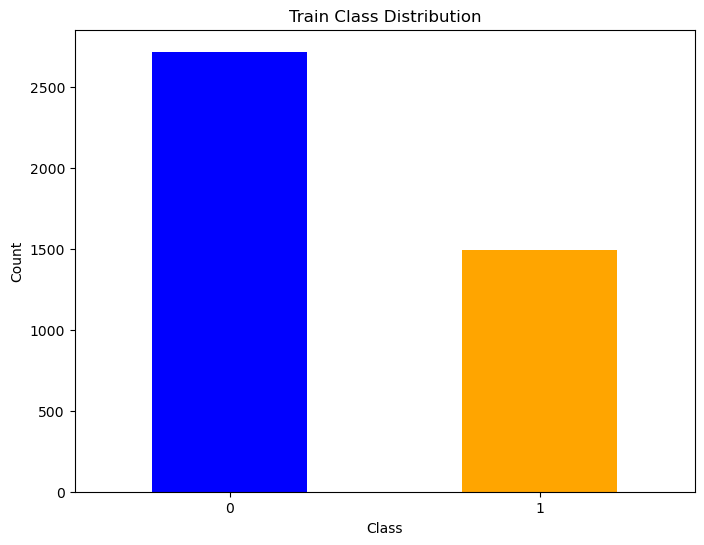

In [10]:
# plot difference in train classes
def plot_class_distribution(data, title):
    plt.figure(figsize=(8, 6))
    data["target"].value_counts().plot(kind="bar", color=["blue", "orange"])
    plt.title(title)
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.xticks(rotation=0)
    plt.show()

plot_class_distribution(data, "Train Class Distribution")

In [5]:
# perform PCA
pca = PCA(n_components=0.95)

data_target = data['age']
data_features = data.drop(columns=['age','eid'])

data_pca = pca.fit_transform(data_features)
data_pca = pd.DataFrame(data_pca, columns=[f'PC{i+1}' for i in range(data_pca.shape[1])])
data_pca['age'] = data_target.values

data_pca.to_csv("../../data/regression/train_fat_pca.csv", index=False)
data_test_features = data_test.drop(columns=['age','eid'])
data_test_pca = pca.transform(data_test_features)
data_test_pca = pd.DataFrame(data_test_pca, columns=[f'PC{i+1}' for i in range(data_test_pca.shape[1])])
data_test_pca['age'] = data_test['age'].values
data_test_pca.to_csv("../../data/regression/test_fat_pca.csv", index=False)


In [2]:
class_data_train = pd.read_csv("../../data/classification/train_fat.csv")
class_data_target_train = class_data_train['target']
class_data_train = class_data_train.drop(columns=['target', 'eid'])

# perform pca 2
pca2 = PCA(n_components=0.95)

class_data_pca = pca2.fit_transform(class_data_train)
class_data_pca = pd.DataFrame(class_data_pca, columns=[f'PC{i+1}' for i in range(class_data_pca.shape[1])])
class_data_pca['target'] = class_data_target_train.values
# shuffle the data
class_data_pca = class_data_pca.sample(frac=1, random_state=42).reset_index(drop=True)

class_data_pca.to_csv("../../data/classification/train_fat_pca.csv", index=False)
class_data_test = pd.read_csv("../../data/classification/test_fat.csv")
class_data_target_test = class_data_test['target']
class_data_test = class_data_test.drop(columns=['target', 'eid'])
class_data_test_pca = pca2.transform(class_data_test)
class_data_test_pca = pd.DataFrame(class_data_test_pca, columns=[f'PC{i+1}' for i in range(class_data_test_pca.shape[1])])
class_data_test_pca['target'] = class_data_target_test.values
# shuffle the data
class_data_test_pca = class_data_test_pca.sample(frac=1, random_state=42).reset_index(drop=True)
class_data_test_pca.to_csv("../../data/classification/test_fat_pca.csv", index=False)

In [3]:
class_data_test_pca.head(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC566,PC567,PC568,PC569,PC570,PC571,PC572,PC573,PC574,target
0,1.465504,-18.203848,17.062728,-3.327375,-2.577832,12.578374,16.984261,-2.627743,8.480979,5.058813,...,-0.891070,-2.736654,-0.139619,0.939866,-0.302019,-0.452042,-0.017596,-0.657382,0.795596,0
1,8.665439,-4.908460,-18.190027,-26.823717,-12.882070,-14.626817,9.870195,-8.514158,-2.509815,-7.880590,...,0.648438,-0.633138,0.058734,0.151531,0.447488,1.594024,0.340521,1.218536,0.175032,1
